<a href="https://colab.research.google.com/github/Hamza-t/7-Days-of-Exploratory-Data-Analysis/blob/main/Fourth_Day_Supermarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supermarket sales

##Context
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

##Attribute information

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

##Importing Liabraries

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
#for importing data(kaggle)
import os
import opendatasets as od

#for stats and data cleaning
import pandas as pd
import numpy as np

#for data viz 
import seaborn as sns 
import matplotlib.pyplot as plt
import opendatasets as od
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
#Display all columns
pd.set_option("display.max_columns", None)

##Data Preparation and Cleaning
Load the file using Pandas .
*   Load the file using Pandas .
*   Look at some information about the data & the columns
*  Fix any missing or incorrect values

In [ ]:
#Connect with Kagle !
path="https://www.kaggle.com/aungpyaeap/supermarket-sales"
od.download(path)

Skipping, found downloaded files in "./supermarket-sales" (use force=True to force download)


In [ ]:
path_c= "./supermarket-sales"
os.listdir(path_c)

['supermarket_sales - Sheet1.csv']

In [ ]:
# Read the file 
data=pd.read_csv(path_c+"/supermarket_sales - Sheet1.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
#Size and info of data
print(f"The size of data is {data.shape}")
print(30*"-")
print("the type of data")
data.dtypes

The size of data is (1000, 17)
------------------------------
the type of data


Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

##Data Cleaning





In [ ]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
#duplicate rows 
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape[0])


number of duplicate rows:  0


In [ ]:
# Missing values 
print(data.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

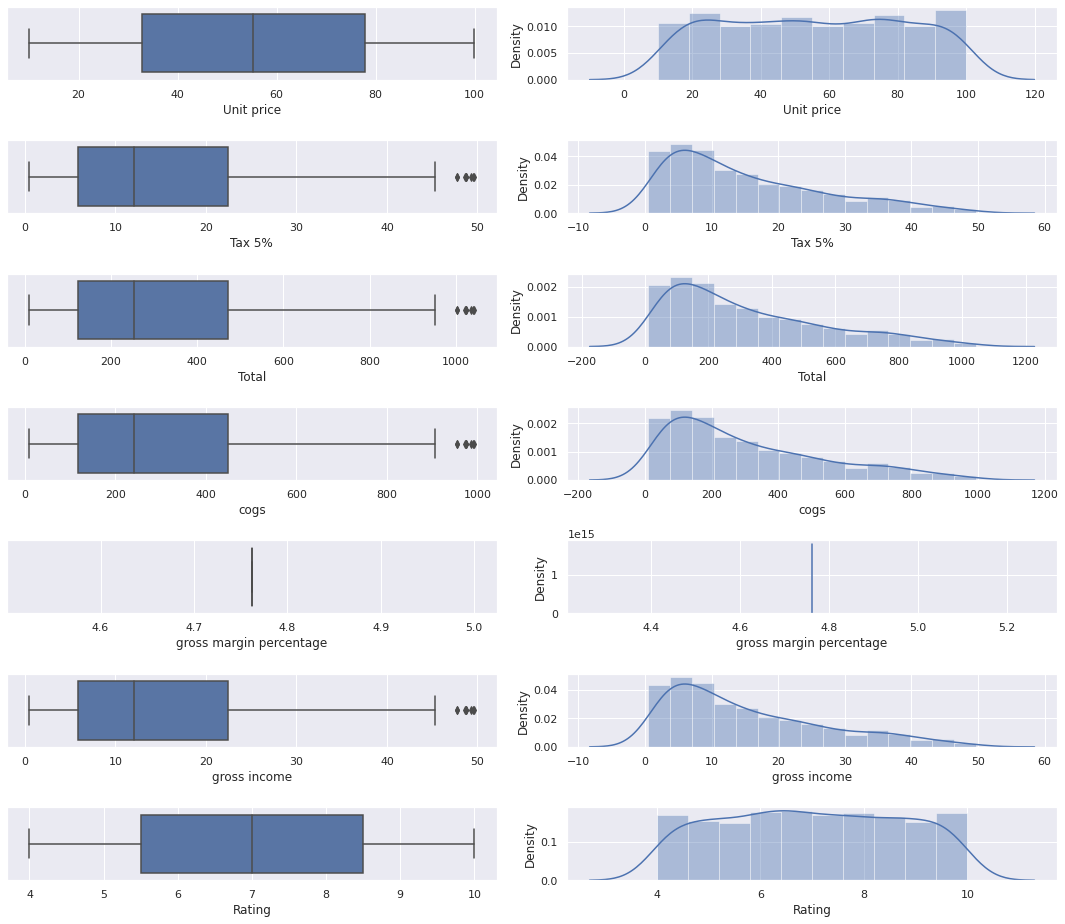

In [ ]:
# Detecting Outliers & Density  
fig, ax = plt.subplots(7, 2, figsize = (15, 13))
liste=data [["Unit price","Tax 5%","Total","cogs","gross margin percentage","gross income","Rating"]]
i,j=(0,0)
for t in liste:
  sns.boxplot(x=data[t] , ax=ax[i,j])
  j=j+1
  sns.distplot(data[t], ax = ax[i,j])
  i=i+1
  j=0
plt.tight_layout()

##So let's make some analysis

###Question 1: In which month most of the sales occur?

####Month-Wise Sales of Supermarket

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Month'].unique()

array([1, 3, 2])

In [ ]:
months = {1:'January', 2:'February', 3:'March'}
data.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Month                               int64
dtype: object

In [ ]:
sales = data.groupby('Month').sum()
sales['month']=sales.index.map(months)
#sales['month']=pd.Series(months)
sales

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,month
Month,,,,,,,,,
1,19753.89,1965,5537.708,116291.868,110754.16,1676.190476,5537.708,2470.2,January
2,17159.52,1654,4629.494,97219.374,92589.88,1442.857143,4629.494,2142.6,February
3,18758.72,1891,5212.167,109455.507,104243.34,1642.857143,5212.167,2359.9,March


Text(0.5, 1.0, 'Sales by months')

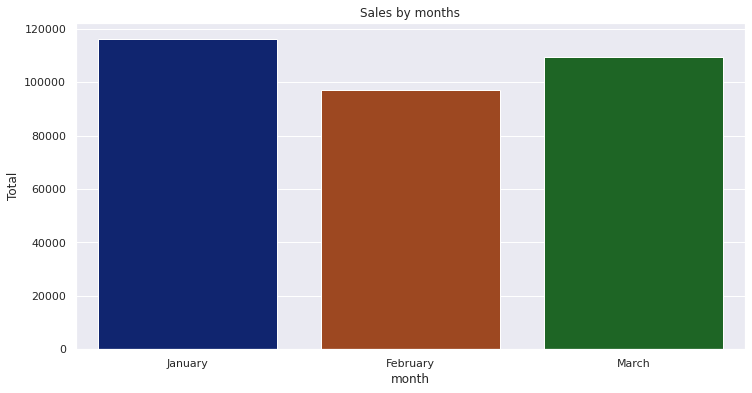

In [ ]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=sales, x='month', y='Total',ax=ax,palette='dark').set_title('Sales by months')

From January, supermarket sales have slightly decreased.
February receives least sales. This can be because February is the shortest month.

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


####Month-Wise Sales of Different Branches

In [ ]:
sales = data.groupby(['Month','City']).sum()
sales['city']=sales.index.get_level_values(1)
sales['month']=sales.index.get_level_values(0).map(months)
sales

Unit price  Quantity     Tax 5%       Total      cogs  \
Month City                                                               
1     Mandalay      6544.41       600  1770.2885  37176.0585  35405.77   
      Naypyitaw     6859.95       680  1925.4610  40434.6810  38509.22   
      Yangon        6349.53       685  1841.9585  38681.1285  36839.17   
2     Mandalay      5919.62       624  1639.2510  34424.2710  32785.02   
      Naypyitaw     5808.97       537  1568.3325  32934.9825  31366.65   
      Yangon        5430.93       493  1421.9105  29860.1205  28438.21   
3     Mandalay      6014.85       596  1647.4925  34597.3425  32949.85   
      Naypyitaw     5898.84       614  1771.3830  37199.0430  35427.66   
      Yangon        6845.03       681  1793.2915  37659.1215  35865.83   

                 gross margin percentage  gross income  Rating       city  \
Month City                                                                  
1     Mandalay                528.571429     1770.2885   755.0   Mandalay   
      Naypyitaw               580.952381     1925.4610   872.9  Naypyitaw   
      Yangon                  566.666667     1841.9585   842.3     Yangon   
2     Mandalay                519.047619     1639.2510   763.9   Mandalay   
      Naypyitaw               476.190476     1568.3325   720.0  Naypyitaw   
      Yangon                  447.619048     1421.9105   658.7     Yangon   
3     Mandalay                533.333333     1647.4925   744.7   Mandalay   
      Naypyitaw               504.761905     1771.3830   727.0  Naypyitaw   
      Yangon                  604.761905     1793.2915   888.2     Yangon   

                    month  
Month City                 
1     Mandalay    January  
      Naypyitaw   January  
      Yangon      January  
2     Mandalay   February  
      Naypyitaw  February  
      Yangon     February  
3     Mandalay      March  
      Naypyitaw     March  
      Yangon        March

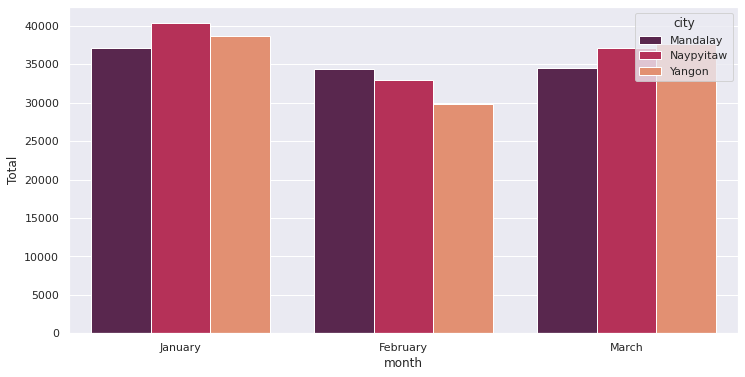

In [ ]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=sales, x='month', y='Total',ax=ax, palette='rocket', hue='city')

* Sales of the branches is similar.
* From January, the sales have slightly decreased for each branch.
* Mandalay has most consistent sales.

###Question 2: How is the overall performance of different branches?

In [ ]:
#Gross income
sales=data.groupby("City").sum()
gross=list(sales['gross income'])
gross

[5057.032000000003, 5265.176500000002, 5057.160500000002]

In [ ]:
#Total 
sales['Total']
total=list(sales['Total'])


In [ ]:
#Membership
yan_member=len(data[(data['Customer type']=='Member') & (data['City']=="Yangon")])
nay_member=len(data[(data['Customer type']=='Member') & (data['City']=="Naypyitaw")])
man_member=len(data[(data['Customer type']=='Member') & (data['City']=="Mandalay")])
member_list=[man_member,nay_member,yan_member]

#liste of names 
city_names = ["Mandalay", "Naypyitaw", "Yangon"]

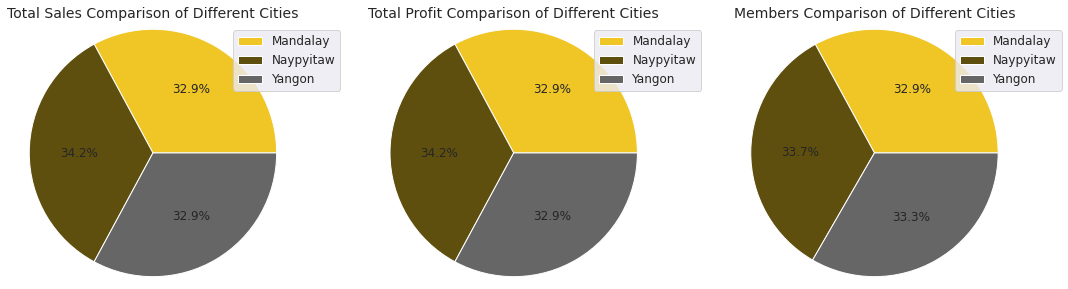

In [ ]:
# plot
fig, axs = plt.subplots(1, 3, figsize=(17, 17))
axs[0].pie(total, colors = ['#efc626', '#5f4f0f', '#666666'], radius=1.2, autopct = "%0.1f%%")
axs[0].set_title('Total Sales Comparison of Different Cities', fontsize=14)
axs[0].legend(city_names, loc = 'upper right', bbox_to_anchor=(1.25,1), fontsize=12)
axs[0].set_aspect('equal')

axs[1].pie(gross, colors = ['#efc626', '#5f4f0f', '#666666'], radius=1.2, autopct = "%0.1f%%")
axs[1].set_title('Total Profit Comparison of Different Cities', fontsize=14)
axs[1].legend(city_names, loc = 'upper right', bbox_to_anchor=(1.25,1), fontsize=12)
axs[1].set_aspect('equal')

axs[2].pie(member_list, colors = ['#efc626', '#5f4f0f', '#666666'], radius=1.2, autopct = "%0.1f%%")
axs[2].set_title('Members Comparison of Different Cities', fontsize=14)
axs[2].legend(city_names, loc = 'upper right', bbox_to_anchor=(1.25,1), fontsize=12)
axs[2].set_aspect('equal')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

* Sales and profit of Napyitaw is slightly larger.
* All the branches have almost same members.

###Question 3: What were the most sold items? What is the most profitable product line?

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [ ]:
sales=data.groupby("Product line").sum()
sales['Unit price']=sales['Unit price']/sales['Quantity']
sales['gross margin percentage'] = sales['gross margin percentage']/sales['Quantity'] 
sales

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Product line,,,,,,,,,
Electronic accessories,9.375664,971,2587.5015,54337.5315,51750.03,0.833701,2587.5015,1177.2,348
Fashion accessories,11.278659,902,2585.9950,54305.8950,51719.90,0.939711,2585.9950,1251.2,346
Food and beverages,10.236912,952,2673.5640,56144.8440,53471.28,0.870348,2673.5640,1237.7,348
Health and beauty,9.763326,854,2342.5590,49193.7390,46851.18,0.847552,2342.5590,1064.5,312
Home and lifestyle,9.715379,911,2564.8530,53861.9130,51297.06,0.836339,2564.8530,1094.0,324
Sports and travel,10.283565,920,2624.8965,55122.8265,52497.93,0.859213,2624.8965,1148.1,315


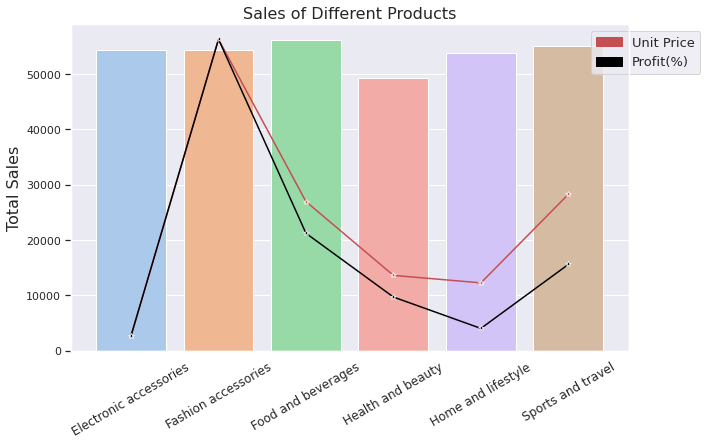

In [ ]:
# Declaring figure parameters
products =  list(sales.index)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Bar Chart
ax1 = sns.barplot(x=products, y=sales['Total'], data = sales, palette='pastel')
ax1.set_title('Sales of Different Products', fontsize = 16)
ax1.set_ylabel('Total Sales', fontsize=16)
ax1.tick_params(axis='x', rotation = 30)
ax1.set_xticklabels(products, fontsize=12)
ax1.tick_params(axis='y')


# Plotting Line Charts
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = products, y= sales['Unit price'], data=sales, color = 'r' ,lw=1.5, marker='*') 
ax2.set(ylabel=None)
ax2.set(yticklabels=[])
ax2.tick_params(left=False)
ax2.set_yticks([])

ax3 = ax1.twinx()
ax3 = sns.lineplot(x = products, y= sales['gross margin percentage'], data=sales, color = 'black', lw=1.5, marker='*')
ax3.set(yticklabels=[])
ax3.set(ylabel=None)
ax3.set_yticks([])

#to set the legend
from matplotlib import patches as mpatches
price = mpatches.Patch(color='r')
profit = mpatches.Patch(color='black')

# Defining Legend
name = ['Unit Price', 'Profit(%)']
ax1.legend(labels=name, handles=[price, profit], loc="upper right", bbox_to_anchor=(1.14, 1), fontsize=13)

plt.show()

* The sales of different products are similar.
* Profit is approximately proportional to the price.
* Profit earned from fashion accessories and food and beverages is significantly larger.

###Question 4: How are the ratings of different product lines? Is there a relation of ratings with prices?

In [ ]:
# calcul the rating of each line 
prod=list(data['Product line'].unique())
dic={}
for i in prod:
  dic[i]=len(data[data['Product line']==i])

In [ ]:
rating=pd.DataFrame.from_dict(dic,orient='index',columns=['Rating_by_categorie'])
# the reference column in rating 
rating['product']=rating.index
# the reference column in sales 
sales['product']=sales.index
#concat data with the new dataframee
sales=pd.merge(sales, rating, on='product')

In [ ]:
sales

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month,product,Rating_by_categorie
0,9.375664,971,2587.5015,54337.5315,51750.03,0.833701,2587.5015,1177.2,348,Electronic accessories,170
1,11.278659,902,2585.9950,54305.8950,51719.90,0.939711,2585.9950,1251.2,346,Fashion accessories,178
2,10.236912,952,2673.5640,56144.8440,53471.28,0.870348,2673.5640,1237.7,348,Food and beverages,174
3,9.763326,854,2342.5590,49193.7390,46851.18,0.847552,2342.5590,1064.5,312,Health and beauty,152
4,9.715379,911,2564.8530,53861.9130,51297.06,0.836339,2564.8530,1094.0,324,Home and lifestyle,160
5,10.283565,920,2624.8965,55122.8265,52497.93,0.859213,2624.8965,1148.1,315,Sports and travel,166


In [ ]:
# lets find the mean of rating of each product line now
sales['rating']=sales['Rating'] / sales['Rating_by_categorie']

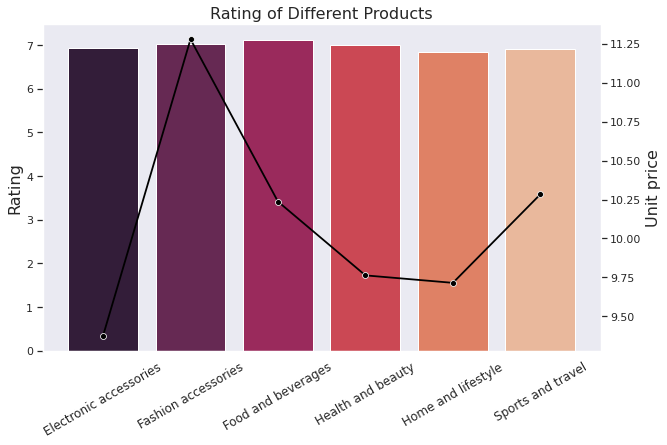

In [ ]:
# viz 
fig, ax1 = plt.subplots(figsize=(10, 6))

#bar plot of rating by product line 
ax1 = sns.barplot(x=products, y=sales['rating'], data = sales, palette='rocket')
ax1.set_title('Rating of Different Products', fontsize = 16)
ax1.set_ylabel('Rating', fontsize=16)
ax1.set_xticklabels(products, fontsize=12)
ax1.tick_params(axis='x', rotation = 30)
ax1.tick_params(axis='y')
#line plot of unit prices by product line
ax3 = ax1.twinx()
ax3.set_ylabel('Unit price',  fontsize = 16)
ax3 = sns.lineplot(x = products, y= 'Unit price', data=sales, color = 'black', marker='o', lw=1.8)
ax3.tick_params(axis='y')
ax1.grid(False)
ax3.grid(False)
plt.show()

* The rating is similar for all lines , no visible relation of rating with unit prices  

###Question 5: Who are the leading buyers?

In [ ]:
#Obtaining Sales of Members and Non-Members
sales_m=data.groupby('Customer type').sum()
sales_m_list=list(sales_m['Total'])

#Obtaining Sales of Males and Females
sales_g=data.groupby('Gender').sum()
sales_g_list=list(sales_g['Total'])

custom_types= ['Member', 'Normal']
custom_gender=['Famale','Male']

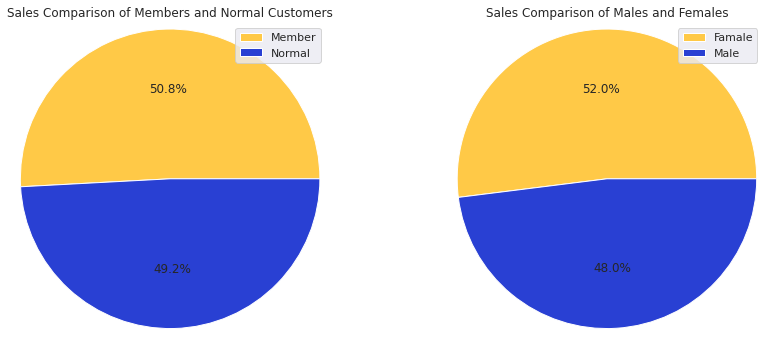

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(13, 13))

#Sales of Members and Non-Members
axs[0].pie(sales_m_list, colors = ['#ffc947', '#2940d3'], radius=1.2, autopct = "%0.1f%%")
axs[0].set_title('Sales Comparison of Members and Normal Customers')
axs[0].legend(custom_types, loc = 'upper right')
axs[0].set_aspect('equal')

#Sales of Males and Females
axs[1].pie(sales_g_list, colors = ['#ffc947', '#2940d3'], radius=1.2, autopct = "%0.1f%%")
axs[1].set_title('Sales Comparison of Males and Females')
axs[1].legend(custom_gender, loc = 'upper right')
axs[1].set_aspect('equal')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


* The sale from members and non-members is almost same.
* The sale from female customers is slightly more than the male customers

###Question 6: Which days of the week have most sales?

In [ ]:
# the day column
data['day'] =  pd.to_datetime(data['Date']).dt.day_name()

#group by day 
sales_d = data.groupby('day').sum()
sales_d = sales_d.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) 
sales_d

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
day,,,,,,,,,
Monday,7216.00,638,1804.7180,37899.0780,36094.36,595.238095,1804.7180,894.2,245
Tuesday,8664.28,862,2451.5355,51482.2455,49030.71,752.380952,2451.5355,1106.5,312
Wednesday,7688.35,800,2082.4350,43731.1350,41648.70,680.952381,2082.4350,973.2,280
Thursday,7860.35,755,2159.4880,45349.2480,43189.76,657.142857,2159.4880,950.8,264
Friday,7658.52,758,2091.7305,43926.3405,41834.61,661.904762,2091.7305,983.6,289
Saturday,9333.74,919,2672.4195,56120.8095,53448.39,780.952381,2672.4195,1131.9,337
Sunday,7250.89,778,2117.0425,44457.8925,42340.85,633.333333,2117.0425,932.5,266


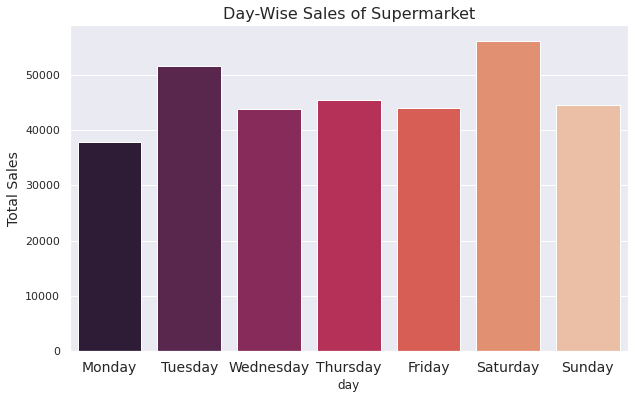

In [ ]:
# plot
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1 = sns.barplot(x=sales_d.index, y=sales_d['Total'], data = sales_d, palette='rocket')
ax1.set_title('Day-Wise Sales of Supermarket', size=16)

ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_ylabel('Total Sales', fontsize=14)
ax1.set_xticklabels(sales_d.index, fontsize=14)
plt.show()

* Tuesday and saturday have larger sale in the week.


###Question 7: How different customers prefer visiting the supermarket ? (with day)


In [ ]:
# Customers type

In [ ]:
sales = data.groupby(['day','Customer type']).sum()
sales['Day']=sales.index.get_level_values(0)
sales['member_type']=sales.index.get_level_values(1)


In [ ]:
# sort column by a list function 
def tm_sorter(column):
    """Sort function"""
    week=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    correspondence = {team: order for order, team in enumerate(week)}
    return column.map(correspondence)

sales=sales.sort_values(by='day', key=tm_sorter)

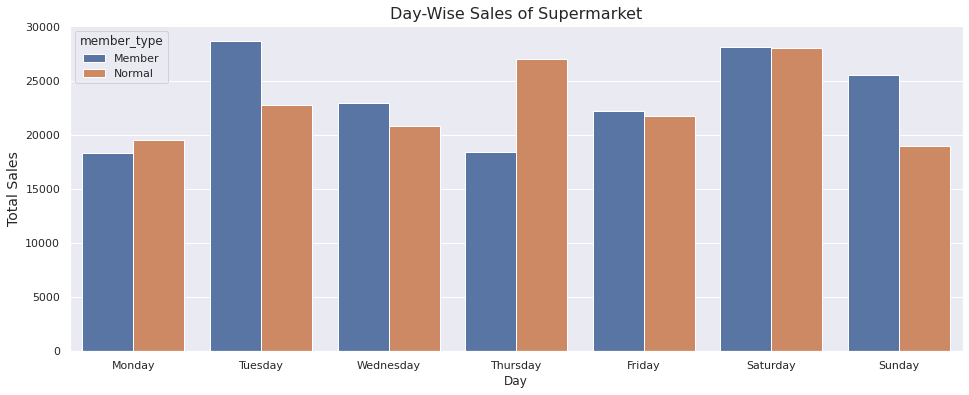

In [ ]:
#Sales Analysis Based on Membership
fig, ax1 = plt.subplots(figsize=(16, 6))

ax1=sns.barplot(data=sales, x='Day', y='Total', hue='member_type')    #palette='rocket'

ax1.set_title('Day-Wise Sales of Supermarket', size=16)
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_ylabel('Total Sales', fontsize=14)
plt.show()

* On tuesday and sunday, member purchases is larger. On these days, supermarket should focus on member's segment.
* On thursday, non-member purchases is larger. On this day, supermarket has a better chance to increase memberships.

In [ ]:
#Gender

In [ ]:
sales = data.groupby(['day','Gender']).sum()
sales['Day']=sales.index.get_level_values(0)
sales['member_gender']=sales.index.get_level_values(1)

In [ ]:
sales=sales.sort_values(by='Day', key=tm_sorter)

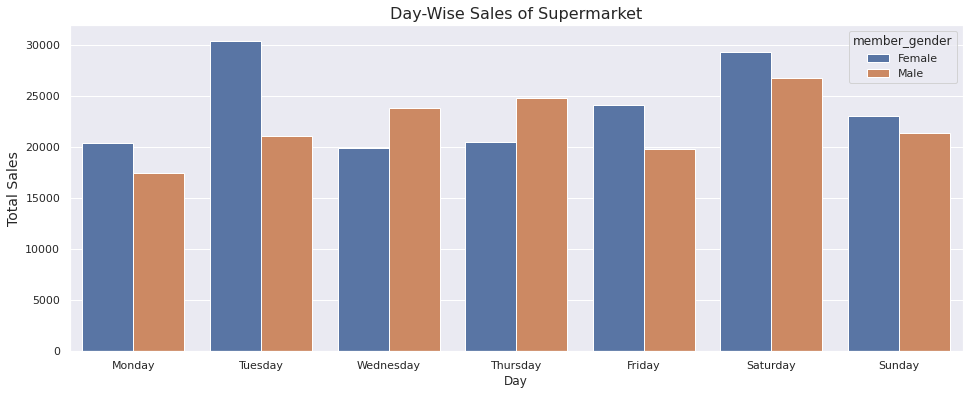

In [ ]:
#Sales Analysis Based on Membership
fig, ax1 = plt.subplots(figsize=(16, 6))

ax1=sns.barplot(data=sales, x='Day', y='Total', hue='member_gender')    #palette='rocket'

ax1.set_title('Day-Wise Sales of Supermarket', size=16)
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_ylabel('Total Sales', fontsize=14)
plt.show()

* Sales from males and females is similar. Families seem to do most of the purchases.
* Exceptionally, on tuesday number of female customers is significantly larger. Therefore; on tuesday, supermarket should focus more on ladies segment.
* Wednesday and thursday have more male customers. Therefore; on these days, supermarket should focus on men segment.

###Question 8: Which customer segment prefer membership?

In [ ]:
#Obtaining number of each gender for Members 
data_member=data[data['Customer type']=="Member"]
num_m=len(data_member[data_member['Gender']=="Male"])
num_f=len(data_member[data_member['Gender']=="Female"])
gender_num=[num_f,num_m]

#Obtaining number of each gender for Non-Members
data_non_member=data[data['Customer type']=="Normal"]
num_n_m=len(data_non_member[data_non_member['Gender']=="Male"])
num_n_f=len(data_non_member[data_non_member['Gender']=="Female"])
gender_n_num=[num_n_f,num_n_m]

custom_types= ['Member', 'Normal']
custom_gender=['Famale','Male']

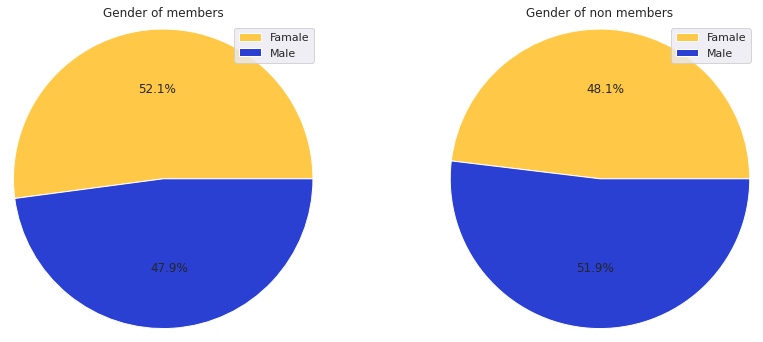

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(13, 13))

#Sales of Members and Non-Members
axs[0].pie(gender_num, colors = ['#ffc947', '#2940d3'], radius=1.2, autopct = "%0.1f%%")
axs[0].set_title('Gender of members')
axs[0].legend(custom_gender, loc = 'upper right')
axs[0].set_aspect('equal')

#Sales of Males and Females
axs[1].pie(gender_n_num, colors = ['#ffc947', '#2940d3'], radius=1.2, autopct = "%0.1f%%")
axs[1].set_title('Gender of non members')
axs[1].legend(custom_gender, loc = 'upper right')
axs[1].set_aspect('equal')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


* There is a slight difference between female and male memberships.
* The difference between male and female non-members is also small.
* Overall, female customers prefer memberships slightly more.

In [ ]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month', 'day'],
      dtype='object')

###Question 9: Which products are more purchased by different customer segments?

In [ ]:
#gender 
data_g=data.groupby(['Product line','Gender']).sum()
data_g['product_line']=data_g.index.get_level_values(0)
data_g['gender']=data_g.index.get_level_values(1)

#customers type 
data_c=data.groupby(['Product line','Customer type']).sum()
data_c['product_line']=data_c.index.get_level_values(0)
data_c['custom_type']=data_c.index.get_level_values(1)


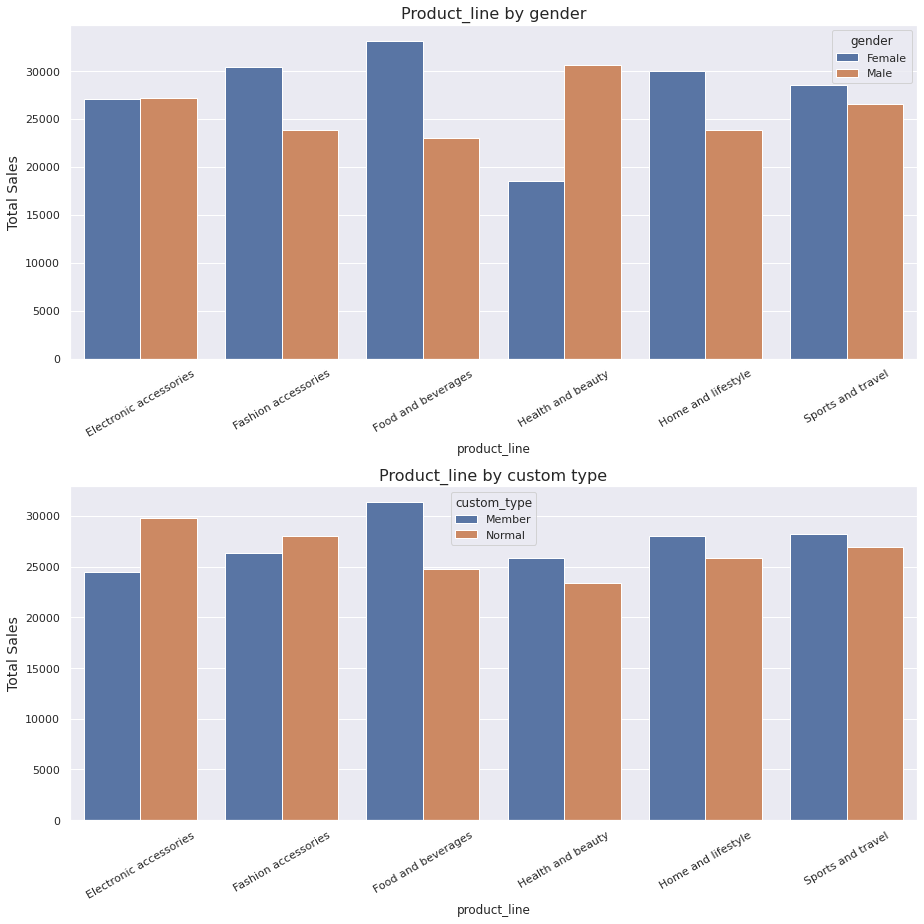

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(13, 13))

#fig, ax1 = plt.subplots(figsize=(16, 6))

sns.barplot(data=data_g, x='product_line', y='Total', hue='gender',ax=ax[0] )#palette='rocket'
ax[0].set_title('Product_line by gender', size=16)
ax[0].tick_params(axis='x',rotation = 30)
ax[0].tick_params(axis='y')
ax[0].set_ylabel('Total Sales', fontsize=14)

#fig, ax1 = plt.subplots(figsize=(16, 6))

sns.barplot(data=data_c, x='product_line', y='Total', hue='custom_type',ax=ax[1])    #palette='rocket'
ax[1].set_title('Product_line by custom type', size=16)
ax[1].tick_params(axis='x',rotation = 30)
ax[1].tick_params(axis='y')
ax[1].set_ylabel('Total Sales', fontsize=14)
fig.tight_layout()
plt.show()

* Based on Gender:
   * "Electronic Accessories" and "Sports and Travel" items are almost equally purchased by males and females.
   * Female customers contribute larger amount of sales from "Fashion Accessories", "Food and Beverages" and "Home and Lifestyle".
   * Male customers contribute larger amount of sales from "Health adn Beauty".
* Based on Membership:
   * "Fashion Accessories" "Health and Beauty", "Home and Lifestyle" and "Sports and Travel" items are almost equally purchased by Members and Non-Members.
   * Non-Members contribute larger amount of sales from "Electronic Accessories".
Members contribute larger amount of sales from "Food and Beverages".

###Question 10: What is the preferred payment for different customers?

In [ ]:
print(data['Payment'].unique())

['Ewallet' 'Cash' 'Credit card']


In [ ]:
#gender 
data_g=data.groupby(['Payment','Gender']).sum()
data_g['Payment']=data_g.index.get_level_values(0)
data_g['gender']=data_g.index.get_level_values(1)

#customers type 
data_c=data.groupby(['Payment','Customer type']).sum()
data_c['Payment']=data_c.index.get_level_values(0)
data_c['custom_type']=data_c.index.get_level_values(1)


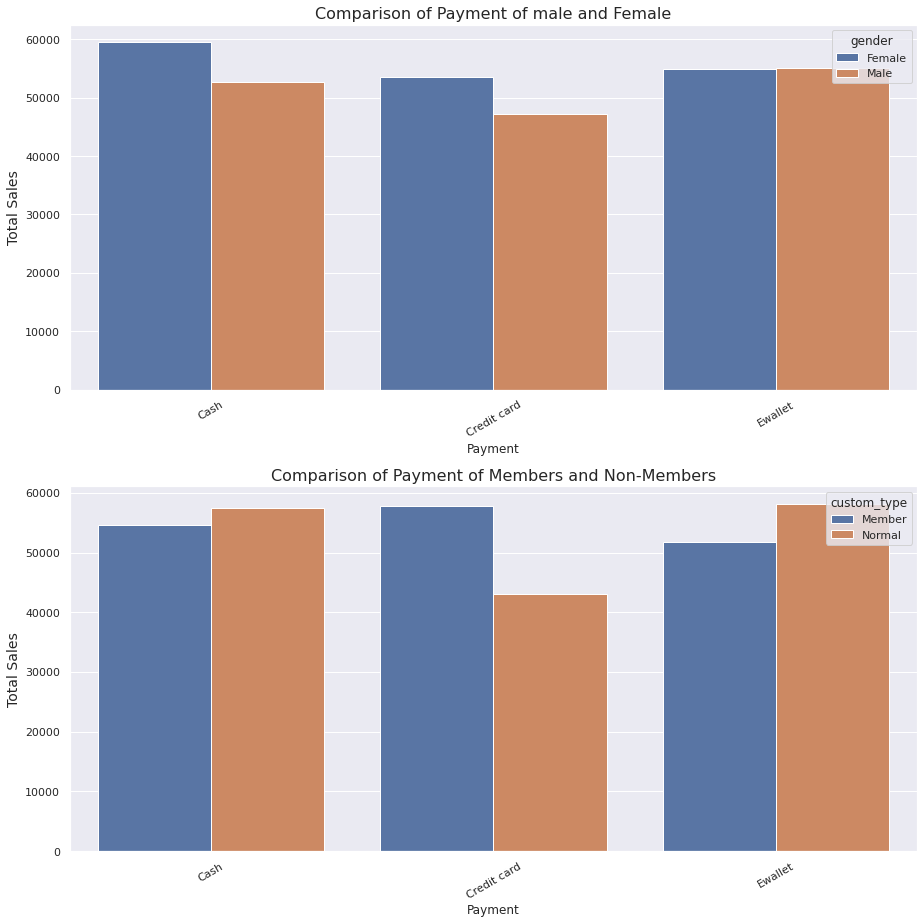

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(13, 13))

#fig, ax1 = plt.subplots(figsize=(16, 6))

sns.barplot(data=data_g, x='Payment', y='Total', hue='gender',ax=ax[0] )#palette='rocket'
ax[0].set_title('Comparison of Payment of male and Female', size=16)
ax[0].tick_params(axis='x',rotation = 30)
ax[0].tick_params(axis='y')
ax[0].set_ylabel('Total Sales', fontsize=14)

#fig, ax1 = plt.subplots(figsize=(16, 6))

sns.barplot(data=data_c, x='Payment', y='Total', hue='custom_type',ax=ax[1])    #palette='rocket'
ax[1].set_title('Comparison of Payment of Members and Non-Members', size=16)
ax[1].tick_params(axis='x',rotation = 30)
ax[1].tick_params(axis='y')
ax[1].set_ylabel('Total Sales', fontsize=14)
fig.tight_layout()
plt.show()

* Based on Memberships:
    * All payment methods are significantly used.
    * Cash payments methods are almost equally used among members and non-members.
    * Members use more credit card payments.
    * Non-members use slightly larger e-wallet payments.
* Based on Gender:
    * All payment methods are significantly used.
    * Cash and credit card payments methods are more used by females.
    * Ewallet payment is almost equally used by both the genders

In [ ]:
# END!! 